<a href="https://colab.research.google.com/github/MFairuziIszamAziz/APMProjectKel8A/blob/main/P2/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

df = pd.read_csv("playgolf_data.csv")
print("\n Given Play Golf Dataset:\n\n", df)


 Given Play Golf Dataset:

      Outlook Temperature Humidity    Wind PlayGolf
0      Sunny         Hot     High    Weak       No
1      Sunny         Hot     High  Strong       No
2   Overcast         Hot     High    Weak      Yes
3      Rainy        Mild     High    Weak      Yes
4      Rainy        Cool   Normal    Weak      Yes
5      Rainy        Cool   Normal  Strong       No
6   Overcast        Cool   Normal  Strong      Yes
7      Sunny        Mild     High    Weak       No
8      Sunny        Cool   Normal    Weak      Yes
9      Rainy        Mild   Normal    Weak      Yes
10     Sunny        Mild   Normal  Strong      Yes
11  Overcast        Mild     High  Strong      Yes
12  Overcast         Hot   Normal    Weak      Yes
13     Rainy        Mild     High  Strong       No


In [7]:
t = df.keys()[-1]
print('Target Attribute is   ➡ ', t)

# Get the attribute names from input dataset
attribute_names = list(df.keys())

#Remove the target attribute from the attribute names list
attribute_names.remove(t) 

print('Predicting Attributes ➡ ', attribute_names)

Target Attribute is   ➡  PlayGolf
Predicting Attributes ➡  ['Outlook', 'Temperature', 'Humidity', 'Wind']


In [10]:
#Function to calculate the entropy of probaility of observations
# -p*log2*p

import math
def entropy(probs):  
    return sum( [-prob*math.log(prob, 2) for prob in probs])

#Function to calulate the entropy of the given Datasets/List with respect to target attributes
def entropy_of_list(ls,value):  
    from collections import Counter
    
    # Total intances associated with respective attribute
    total_instances = len(ls)  # = 14
    print("---------------------------------------------------------")
    print("\nTotal no of instances/records associated with '{0}' is ➡ {1}".format(value,total_instances))
    # Counter calculates the propotion of class
    cnt = Counter(x for x in ls)
    print('\nTarget attribute class count(Yes/No)=',dict(cnt))
    
    # x means no of YES/NO
    probs = [x / total_instances for x in cnt.values()]  
    print("\nClasses➡", max(cnt), min(cnt))
    print("\nProbabilities of Class 'p'='{0}' ➡ {1}".format(max(cnt),max(probs)))
    print("Probabilities of Class 'n'='{0}'  ➡ {1}".format(min(cnt),min(probs)))
    
    # Call Entropy 
    return entropy(probs) 

In [11]:
def information_gain(df, split_attribute, target_attribute,battr):
    print("\n\n----- Information Gain Calculation of",split_attribute,"----- ") 
    
    # group the data based on attribute values
    df_split = df.groupby(split_attribute) 
    glist=[]
    for gname,group in df_split:
        print('Grouped Attribute Values \n',group)
        print("---------------------------------------------------------")
        glist.append(gname) 
    
    glist.reverse()
    nobs = len(df.index) * 1.0   
    df_agg1=df_split.agg({target_attribute:lambda x:entropy_of_list(x, glist.pop())})
    df_agg2=df_split.agg({target_attribute :lambda x:len(x)/nobs})
    
    df_agg1.columns=['Entropy']
    df_agg2.columns=['Proportion']
    
    # Calculate Information Gain:
    new_entropy = sum( df_agg1['Entropy'] * df_agg2['Proportion'])
    if battr !='S':
        old_entropy = entropy_of_list(df[target_attribute],'S-'+df.iloc[0][df.columns.get_loc(battr)])
    else:
        old_entropy = entropy_of_list(df[target_attribute],battr)
    return old_entropy - new_entropy

In [12]:
def id3(df, target_attribute, attribute_names, default_class=None,default_attr='S'):
    
    from collections import Counter
    cnt = Counter(x for x in df[target_attribute])# class of YES /NO
    
    ## First check: Is this split of the dataset homogeneous?
    if len(cnt) == 1:
        return next(iter(cnt))  # next input data set, or raises StopIteration when EOF is hit.
    
    ## Second check: Is this split of the dataset empty? if yes, return a default value
    elif df.empty or (not attribute_names):
        return default_class  # Return None for Empty Data Set
    
    ## Otherwise: This dataset is ready to be devied up!
    else:
        # Get Default Value for next recursive call of this function:
        default_class = max(cnt.keys()) #No of YES and NO Class
        # Compute the Information Gain of the attributes:
        gainz=[]
        for attr in attribute_names:
            ig= information_gain(df, attr, target_attribute,default_attr)
            gainz.append(ig)
            print('\nInformation gain of','“',attr,'”','is ➡', ig)
            print("=========================================================")
        
        index_of_max = gainz.index(max(gainz))               # Index of Best Attribute
        best_attr = attribute_names[index_of_max]            # Choose Best Attribute to split on
        print("\nList of Gain for arrtibutes:",attribute_names,"\nare:", gainz,"respectively.")
        print("\nAttribute with the maximum gain is ➡", best_attr)
        print("\nHence, the Root node will be ➡", best_attr)
        print("=========================================================")

        # Create an empty tree, to be populated in a moment
        tree = {best_attr:{}} # Initiate the tree with best attribute as a node 
        remaining_attribute_names =[i for i in attribute_names if i != best_attr]
        
        # Split dataset-On each split, recursively call this algorithm.Populate the empty tree with subtrees, which
        # are the result of the recursive call
        for attr_val, data_subset in df.groupby(best_attr):
            subtree = id3(data_subset,target_attribute, remaining_attribute_names,default_class,best_attr)
            tree[best_attr][attr_val] = subtree
        return tree

In [13]:
#Function to calulate the entropy of the given Dataset with respect to target attributes
def entropy_dataset(a_list):  
    from collections import Counter

    # Counter calculates the propotion of class
    cnt = Counter(x for x in a_list)   
    num_instances = len(a_list)*1.0    # = 14
    print("\nNumber of Instances of the Current Sub-Class is {0}".format(num_instances ))
    
    # x means no of YES/NO
    probs = [x / num_instances for x in cnt.values()]  
    print("\nClasses➡", "'p'=",max(cnt), "'n'=",min(cnt))
    print("\nProbabilities of Class 'p'='{0}' ➡ {1}".format(max(cnt),max(probs)))
    print("Probabilities of Class 'n'='{0}'  ➡ {1}".format(min(cnt),min(probs)))
    
    # Call Entropy
    return entropy(probs) 
    
# The initial entropy of the YES/NO attribute for our dataset.
print("Entropy calculation for input dataset:\n")
print(df['PlayGolf'])

total_entropy = entropy_dataset(df['PlayGolf'])
print("\nTotal Entropy(S) of PlayGolf Dataset➡", total_entropy)
print("=========================================================")
####################################################

from pprint import pprint
tree = id3(df,t,attribute_names)
print("\nThe Resultant Decision Tree is: ⤵\n")
pprint(tree)

attribute = next(iter(tree))
print("\nBest Attribute ➡",attribute)
print("Tree Keys      ➡",tree[attribute].keys())

Entropy calculation for input dataset:

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: PlayGolf, dtype: object

Number of Instances of the Current Sub-Class is 14.0

Classes➡ 'p'= Yes 'n'= No

Probabilities of Class 'p'='Yes' ➡ 0.6428571428571429
Probabilities of Class 'n'='No'  ➡ 0.35714285714285715

Total Entropy(S) of PlayGolf Dataset➡ 0.9402859586706309


----- Information Gain Calculation of Outlook ----- 
Grouped Attribute Values 
      Outlook Temperature Humidity    Wind PlayGolf
2   Overcast         Hot     High    Weak      Yes
6   Overcast        Cool   Normal  Strong      Yes
11  Overcast        Mild     High  Strong      Yes
12  Overcast         Hot   Normal    Weak      Yes
---------------------------------------------------------
Grouped Attribute Values 
    Outlook Temperature Humidity    Wind PlayGolf
3    Rainy        Mild     High    Weak      Yes
4    Rainy        Coo

In [16]:
def classify(instance, tree,default=None):  # Instance of Play Tennis with Predicted    
    attribute = next(iter(tree))            # Outlook/Humidity/Wind       
    if instance[attribute] in tree[attribute].keys(): # Value of the attributs in  set of Tree keys  
        result = tree[attribute][instance[attribute]]
        if isinstance(result, dict):                  # this is a tree, delve deeper
            return classify(instance, result)
        else:
            return result # this is a label
    else:
        return default
    
df_new=pd.read_csv('playgolf_data.csv')
df_new['Predicted'] = df_new.apply(classify, axis=1, args=(tree,'?')) 
print(df_new)

     Outlook Temperature Humidity    Wind PlayGolf Predicted
0      Sunny         Hot     High    Weak       No        No
1      Sunny         Hot     High  Strong       No        No
2   Overcast         Hot     High    Weak      Yes       Yes
3      Rainy        Mild     High    Weak      Yes       Yes
4      Rainy        Cool   Normal    Weak      Yes       Yes
5      Rainy        Cool   Normal  Strong       No        No
6   Overcast        Cool   Normal  Strong      Yes       Yes
7      Sunny        Mild     High    Weak       No        No
8      Sunny        Cool   Normal    Weak      Yes       Yes
9      Rainy        Mild   Normal    Weak      Yes       Yes
10     Sunny        Mild   Normal  Strong      Yes       Yes
11  Overcast        Mild     High  Strong      Yes       Yes
12  Overcast         Hot   Normal    Weak      Yes       Yes
13     Rainy        Mild     High  Strong       No        No


In [19]:
pip install numpy

In [20]:
pip install pandas

In [22]:
# Importing the necessary module!

import numpy as np
import pandas as pd

In [24]:
# Importing data

df = pd.read_csv("playgolf_data.csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [25]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_getdummy

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,0,1,0,1,0,0,0,1,0,1
1,No,0,1,0,1,0,0,0,1,1,0
2,Yes,0,1,0,1,0,1,0,0,0,1
3,Yes,0,0,1,1,0,0,1,0,0,1
4,Yes,1,0,0,0,1,0,1,0,0,1
5,No,1,0,0,0,1,0,1,0,1,0
6,Yes,1,0,0,0,1,1,0,0,1,0
7,No,0,0,1,1,0,0,0,1,0,1
8,Yes,1,0,0,0,1,0,0,1,0,1
9,Yes,0,0,1,0,1,0,1,0,0,1


In [26]:
pip install sklearn

In [27]:
# Separating the training set and test set

from sklearn.model_selection import train_test_split

X = df_getdummy.drop('PlayGolf',axis=1)
y = df_getdummy['PlayGolf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [31]:
# importing Decision Tree Classifier via sklean

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [29]:
pip install matplotlib

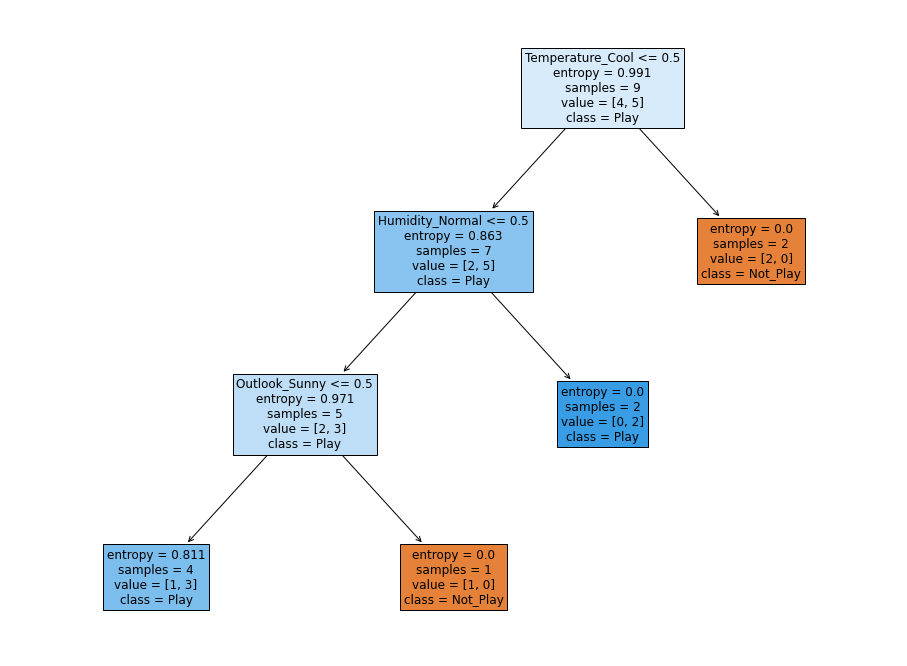

In [32]:
# visualising the decision tree diagram

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df_getdummy.columns, fontsize=12, filled=True, 
              class_names=['Not_Play', 'Play'])